In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
res_4_df = pd.read_csv('results_1.4.csv')

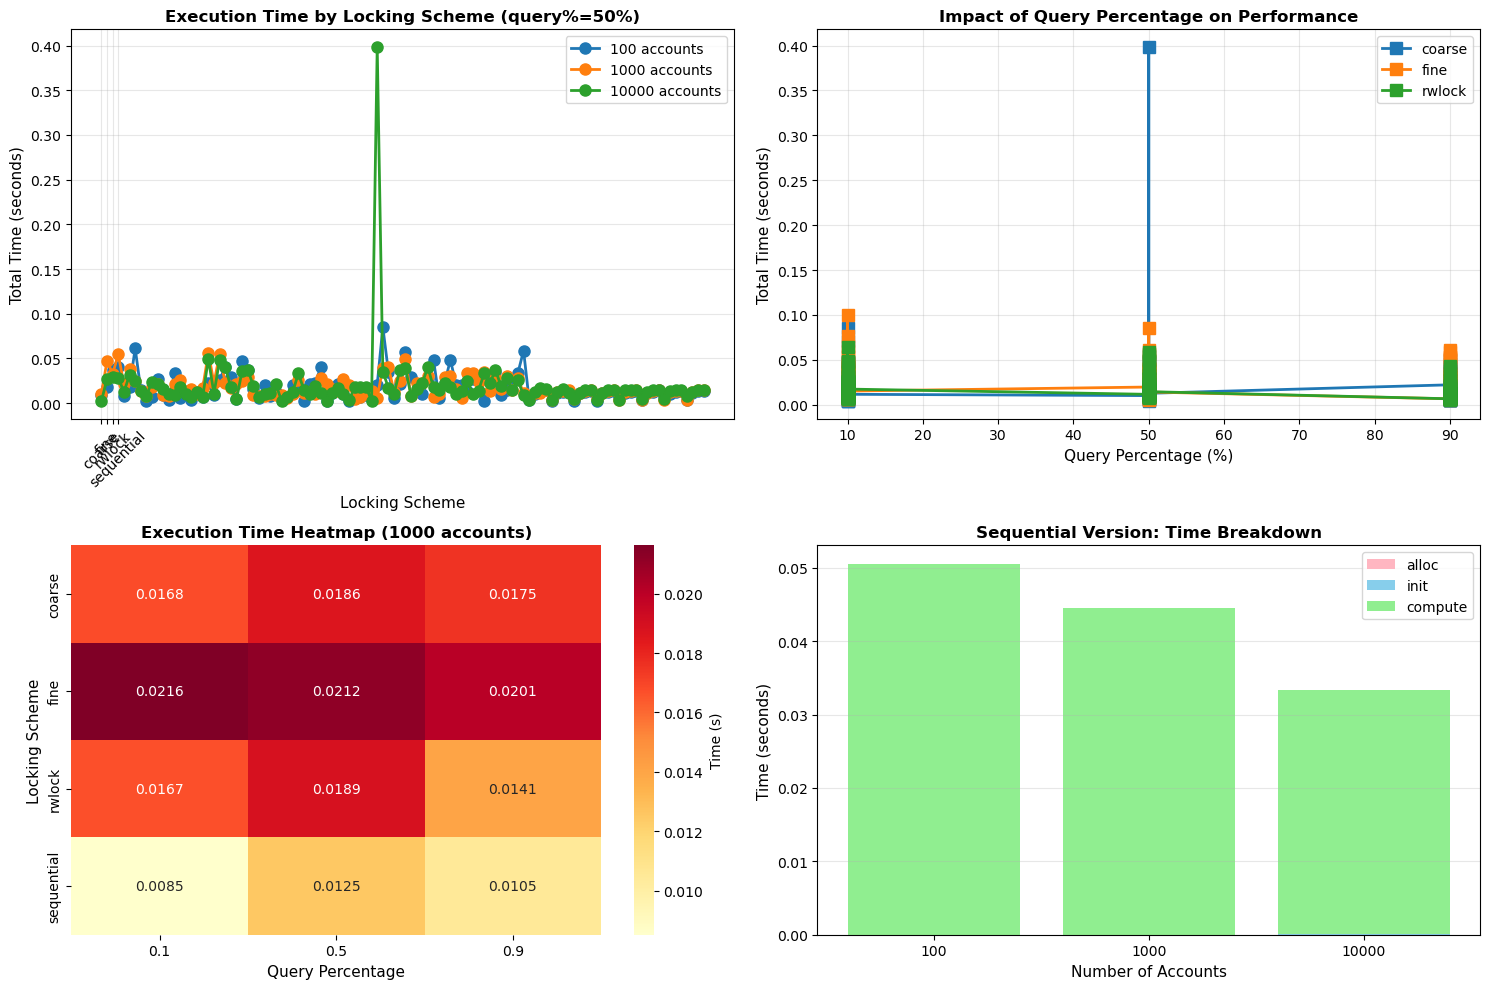

Bank Simulation Summary:
  Sequential baseline: 0.001958s
  Locking schemes tested: coarse, fine, rwlock, sequential


In [6]:
# 1.4 Bank Simulation Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

locking_schemes = sorted(res_4_df['locking_scheme'].unique())
accounts_list = sorted(res_4_df['accounts'].unique())
query_pcts = sorted(res_4_df['query_pct'].unique())

# Performance by locking scheme and accounts (query_pct = 0.5)
mid_query = 0.5
for accounts in accounts_list[:3]:  # Show 3 account sizes
    data_subset = res_4_df[(res_4_df['accounts'] == accounts) & (res_4_df['query_pct'] == mid_query)]
    axes[0, 0].plot(range(len(data_subset)), data_subset['time_total'], 
                   marker='o', linewidth=2, markersize=8, label=f'{accounts} accounts')

axes[0, 0].set_xlabel('Locking Scheme', fontsize=11)
axes[0, 0].set_ylabel('Total Time (seconds)', fontsize=11)
axes[0, 0].set_title(f'Execution Time by Locking Scheme (query%={mid_query*100:.0f}%)', fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(range(len(locking_schemes)))
axes[0, 0].set_xticklabels(locking_schemes, rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Impact of query percentage
for scheme in locking_schemes[:3]:  # Show 3 schemes
    scheme_data = res_4_df[res_4_df['locking_scheme'] == scheme].copy()
    scheme_data = scheme_data.sort_values('query_pct')
    axes[0, 1].plot(scheme_data['query_pct'] * 100, scheme_data['time_total'], 
                   marker='s', linewidth=2, markersize=8, label=scheme)

axes[0, 1].set_xlabel('Query Percentage (%)', fontsize=11)
axes[0, 1].set_ylabel('Total Time (seconds)', fontsize=11)
axes[0, 1].set_title('Impact of Query Percentage on Performance', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Heatmap: locking scheme vs query percentage for fixed accounts
heatmap_data = res_4_df[res_4_df['accounts'] == accounts_list[1]].pivot_table(
    values='time_total', index='locking_scheme', columns='query_pct')

sns.heatmap(heatmap_data, annot=True, fmt='.4f', cmap='YlOrRd', ax=axes[1, 0], cbar_kws={'label': 'Time (s)'})
axes[1, 0].set_title(f'Execution Time Heatmap ({accounts_list[1]} accounts)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Locking Scheme', fontsize=11)
axes[1, 0].set_xlabel('Query Percentage', fontsize=11)

# Time breakdown for sequential
seq_data = res_4_df[res_4_df['locking_scheme'] == 'sequential'].copy()
seq_data = seq_data.sort_values('accounts')

time_comps_4 = ['time_alloc', 'time_init', 'time_compute', 'time_thread_create', 'time_thread_join']
colors_4 = ['#FFB6C1', '#87CEEB', '#90EE90', '#FFD700', '#DDA0DD']

bottom_4 = np.zeros(len(seq_data))
for idx, comp in enumerate(time_comps_4[:3]):  # Show top 3
    axes[1, 1].bar(seq_data['accounts'].astype(str), seq_data[comp], 
                  bottom=bottom_4, label=comp.replace('time_', ''), color=colors_4[idx])
    bottom_4 += seq_data[comp].values

axes[1, 1].set_xlabel('Number of Accounts', fontsize=11)
axes[1, 1].set_ylabel('Time (seconds)', fontsize=11)
axes[1, 1].set_title('Sequential Version: Time Breakdown', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Bank Simulation Summary:")
seq_min = res_4_df[res_4_df['locking_scheme']=='sequential']['time_total'].min()
print(f"  Sequential baseline: {seq_min:.6f}s")
print(f"  Locking schemes tested: {', '.join(locking_schemes)}")